In [8]:
# Reference blog - https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41
%matplotlib inline

import findspark
import os
import time

SPARK_HOME="/home/datta/lab/_KTH_ACADEMIA/id2210/spark-2.4.3-bin-hadoop2.7"
findspark.init(SPARK_HOME)

from pyspark import SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import col, desc

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from IPython import display

sc = SparkContext

spark = (SparkSession
            .builder
            .getOrCreate())

<IPython.core.display.Javascript object>


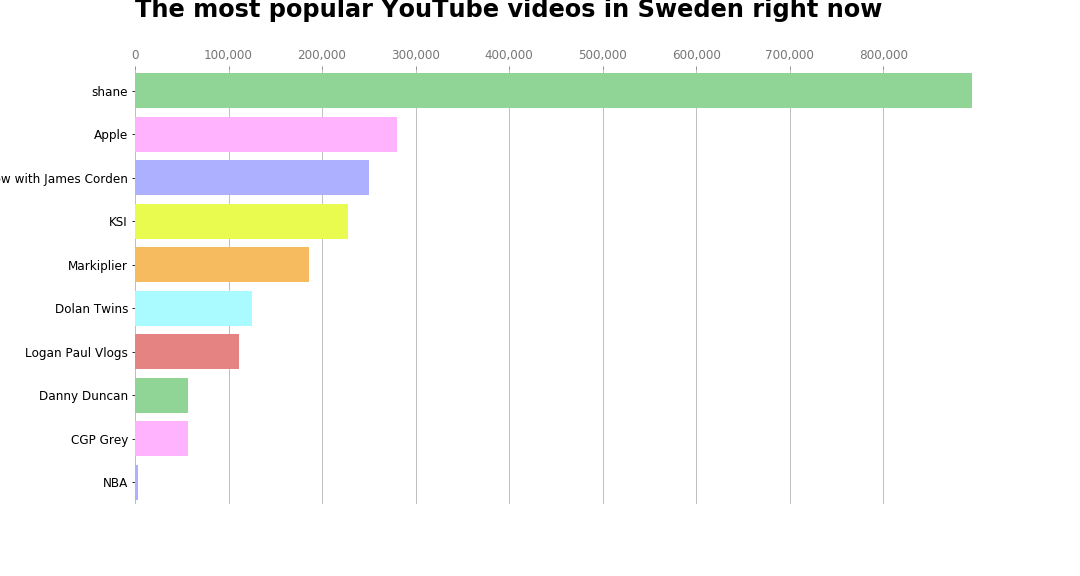

In [ ]:
%matplotlib inline
%matplotlib notebook
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (15, 8)
fig.show()
while True:
        df = spark.read.load("../../spark-warehouse/yt_viz")
        df = df.distinct()
        df = df.orderBy("likeCount", ascending=True)
        df = df.toPandas()


        colors = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
        '#aafbff', '#f7bb5f', '#eafb50']

        _ = ax.clear()
        _ = ax.barh(df['channelTitle'], df['likeCount'], color = colors)
        _ = ax.text(0, 1.12, 'The most popular YouTube videos in Sweden right now',
                transform=ax.transAxes, size=24, weight=600, ha='left')
        _ = ax.set_axisbelow(True)
        
        _ = ax.grid(which='major', axis='x', linestyle='-')
        _ = ax.margins(0, 0.01)
        _ = ax.tick_params(axis='x', colors='#777777', labelsize=12)
        _ = ax.tick_params(axis='y', labelsize=12)
        _ = ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        _ = ax.xaxis.set_ticks_position('top')
        _ = plt.box(False)
        fig.canvas.draw()  # draw
